In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/robi-datathon-30-qualifier-problem-2/problem 2.csv
/kaggle/input/robi-datathon-30-qualifier-problem-2/boxes.csv
/kaggle/input/robi-datathon-30-qualifier-problem-2/sample submission 2.csv
/kaggle/input/robi-datathon-30-qualifier-problem-2/purchase.csv


In [2]:
box=pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-2/boxes.csv')
purchase=pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-2/purchase.csv')
problem=pd.read_csv('/kaggle/input/robi-datathon-30-qualifier-problem-2/problem 2.csv')

In [3]:
purchase

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0
...,...,...,...,...
2455859,28/10/2018,2BD992B5538,12.0,1.0
2455860,28/10/2018,2C97CD72233,17.0,1.0
2455861,28/10/2018,2C91C61D372,40.0,1.0
2455862,28/10/2018,2CD70CFC4E3,51.0,1.0


In [4]:
l1=[]
l2=[]
for i in problem['MAGIC_KEY']:
    l1.append(i)
for i in purchase['MAGIC_KEY']:
    l2.append(i)
    
print(len(l1),len(l2))
l1=set(l1)
l2=set(l2)
l3=l1.intersection(l2)
print(len(l3))

43518 2455864
43518


In [5]:
merged_df = pd.merge(purchase, box, on='BOX_ID')
merged_df

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1/2/2019,2CED678A247,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
1,1/2/2019,2BF58D91BA1,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2,1/2/2019,2C15B86534E,99.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,13.96
3,1/2/2019,2C32D9A859A,6.0,1.0,Premium,Home Delivery - CoD,0.0,2.7,11.96
4,1/2/2019,2C7A55404D1,4.0,1.0,Premium,Home Delivery - CoD,0.0,2.5,11.96
...,...,...,...,...,...,...,...,...,...
2455795,28/10/2018,2BD992B5538,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2455796,28/10/2018,2C97CD72233,17.0,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98
2455797,28/10/2018,2C91C61D372,40.0,1.0,Premium,Home Delivery - CoD,12.0,1.8,19.98
2455798,28/10/2018,2CD70CFC4E3,51.0,1.0,Premium,Home Delivery - CoD,18.0,2.9,23.98


In [6]:
merged_df['BOX_COUNT'].value_counts()

BOX_COUNT
1.0     2453363
2.0        2283
3.0          85
4.0          30
6.0          17
5.0          10
7.0           3
9.0           2
19.0          2
11.0          2
8.0           1
10.0          1
13.0          1
Name: count, dtype: int64

In [7]:
# Assuming 'purchase' is your DataFrame and 'l1' is your list of values to filter

# Filter the DataFrame based on values in the 'MAGIC_KEY' column
filtered_df = merged_df[merged_df['MAGIC_KEY'].isin(l1)]

# Reset the index of the filtered DataFrame
filtered_df = filtered_df.reset_index(drop=True)



In [8]:
filtered_df.head(20)

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1/2/2019,2C15B86534E,99.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,13.96
1,1/2/2019,29D969045C2,238.0,1.0,Standard,Delivery from Collection Point,10.7,0.0,12.78
2,1/2/2019,2A00DE30F46,204.0,1.0,Standard,Home Delivery - CoD,10.7,0.0,12.78
3,1/2/2019,2C2CC83BB99,174.0,1.0,Premium,Delivery from Collection Point,18.0,2.9,23.98
4,1/2/2019,2BE02E54CA0,108.0,1.0,Premium,Delivery from Collection Point,0.0,3.6,15.96
5,1/2/2019,2BC366A7C9C,134.0,1.0,Premium,Delivery from Collection Point,10.0,1.8,19.98
6,1/2/2019,2BE1C36E586,134.0,1.0,Premium,Delivery from Collection Point,10.0,1.8,19.98
7,1/2/2019,2BC455BD088,131.0,1.0,Premium,Delivery from Collection Point,9.0,1.6,19.98
8,1/2/2019,2C25CB2B646,162.0,1.0,Premium,Delivery from Collection Point,10.0,2.2,23.98
9,1/2/2019,2C2A42BF92B,103.0,1.0,Premium,Delivery from Collection Point,0.0,4.0,15.96


In [ ]:
save_dict={}
for i in problem['MAGIC_KEY']:
    for row,column in filtered_df.iterrows():
        l=[]
        if row['MAGIC_KEY']==i:
            l.append(row['BOX_ID'])
        
        save_dict{"MAGIC_KEY":i,"BOX_ID":max(l)}

In [16]:
save_dict = {}
for i in problem['MAGIC_KEY'].unique():
    max_box_id = filtered_df.loc[filtered_df['MAGIC_KEY'] == i, 'BOX_ID'].max()
    save_dict[i] = max_box_id


In [20]:
my_dict_int = {key: int(value) for key, value in save_dict.items()}


In [26]:
df = pd.DataFrame(list(my_dict_int.items()), columns=['MAGIC_KEY', 'BOX_ID'])

# Save DataFrame to CSV
df.to_csv('submission.csv', index=False)

In [9]:
# Convert the 'Date' column to datetime objects
filtered_df['Date'] = pd.to_datetime(filtered_df['PURCHASE_DATE'], format='%d/%m/%Y')

# Extract only the date part (day, month, and year)
filtered_df['Date'] = filtered_df['Date'].dt.date

# Find the most previous date
most_previous_date = filtered_df['Date'].min()

# Find the most recent date
most_recent_date = filtered_df['Date'].max()

print("Most previous date:", most_previous_date)
print("Most recent date:", most_recent_date)


Most previous date: 2018-10-01
Most recent date: 2019-02-28


In [10]:
sorted_df = filtered_df.groupby('MAGIC_KEY').apply(lambda x: x.sort_values('Date')).reset_index(drop=True)

/tmp/ipykernel_33/1931123252.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_df = filtered_df.groupby('MAGIC_KEY').apply(lambda x: x.sort_values('Date')).reset_index(drop=True)


In [11]:
slice_df = sorted_df[1:200]

In [20]:
def find_std(df):
    df['dis']=df['Date'].diff().dt.days
    df=df.dropna()
    if df.dis.count()==1:
        return .98
    x=df['dis'].std()
    return x

In [30]:
def find_mean(df):
    df['dis']=df['Date'].diff().dt.days
    df=df.dropna()
    x=df['dis'].mean()
    return x
    

In [66]:
cur_date = pd.to_datetime('10/03/2019', format='%d/%m/%Y').date()
print(cur_date)
def find_dis(df):
    df=df.reset_index(drop=True)
    index=df.tail(1).index[0]
    date=df['Date'][index]
    print(date)
    diff=cur_date-date
    print(diff)
    

2019-03-10


In [68]:
slice_df.groupby('MAGIC_KEY').apply(find_dis)

2019-02-01
37 days, 0:00:00
2019-02-11
27 days, 0:00:00
2019-02-23
15 days, 0:00:00
2019-02-08
30 days, 0:00:00
2019-02-08
30 days, 0:00:00
2019-02-20
18 days, 0:00:00
2019-02-01
37 days, 0:00:00
2019-02-10
28 days, 0:00:00
2019-02-01
37 days, 0:00:00
2019-02-13
25 days, 0:00:00
2019-01-14
55 days, 0:00:00
2019-02-07
31 days, 0:00:00
2019-02-09
29 days, 0:00:00
2019-02-09
29 days, 0:00:00
2019-02-11
27 days, 0:00:00
2019-02-19
19 days, 0:00:00
2019-02-07
31 days, 0:00:00
2019-02-01
37 days, 0:00:00
2019-02-02
36 days, 0:00:00
2019-02-07
31 days, 0:00:00
2019-02-15
23 days, 0:00:00
2019-02-01
37 days, 0:00:00
2019-02-02
36 days, 0:00:00
2019-02-03
35 days, 0:00:00
2019-02-08
30 days, 0:00:00
2019-02-04
34 days, 0:00:00
2019-02-11
27 days, 0:00:00
2019-02-04
34 days, 0:00:00
2019-02-09
29 days, 0:00:00
2019-02-10
28 days, 0:00:00
2019-02-08
30 days, 0:00:00
2019-02-05
33 days, 0:00:00
2019-02-08
30 days, 0:00:00
2019-02-06
32 days, 0:00:00
2019-02-04
34 days, 0:00:00
2019-02-28
10 days, 

/tmp/ipykernel_33/2068143211.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slice_df.groupby('MAGIC_KEY').apply(find_dis)


""


In [52]:
sorted_df.head(50)

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,Date
0,8/10/2018,297D1B85F05,202.0,1.0,Standard,Home Delivery - CoD,10.0,0.0,12.18,2018-10-08
1,6/11/2018,297D1B85F05,271.0,1.0,Standard,Delivery from Collection Point,16.0,1.8,19.98,2018-11-06
2,4/12/2018,297D1B85F05,271.0,1.0,Standard,Delivery from Collection Point,16.0,1.8,19.98,2018-12-04
3,2/1/2019,297D1B85F05,272.0,1.0,Standard,Delivery from Collection Point,16.0,2.2,19.98,2019-01-02
4,1/2/2019,297D1B85F05,272.0,1.0,Standard,Delivery from Collection Point,16.0,2.2,19.98,2019-02-01
5,13/12/2018,297D1E96722,258.0,1.0,Standard,Delivery from Collection Point,8.0,2.2,17.98,2018-12-13
6,10/1/2019,297D1E96722,272.0,1.0,Standard,Delivery from Collection Point,16.0,2.2,19.98,2019-01-10
7,11/2/2019,297D1E96722,272.0,1.0,Standard,Delivery from Collection Point,16.0,2.2,19.98,2019-02-11
8,7/11/2018,297D1EE2EFE,228.0,1.0,Standard,Delivery from Collection Point,8.3,0.0,9.96,2018-11-07
9,27/1/2019,297D1EE2EFE,228.0,1.0,Standard,Delivery from Collection Point,8.3,0.0,9.96,2019-01-27


In [12]:

for index,row in filtered_df.iterrows():
    if row['MAGIC_KEY']=='2C15B86534E':
        print(row,'\n')
        

PURCHASE_DATE                            1/2/2019
MAGIC_KEY                             2C15B86534E
BOX_ID                                       99.0
BOX_COUNT                                     1.0
QUALITY                                   Premium
DELIVERY_OPTION    Delivery from Collection Point
MILK                                          0.0
MEAT                                          3.3
UNIT_PRICE                                  13.96
Name: 0, dtype: object 

PURCHASE_DATE                          20/12/2018
MAGIC_KEY                             2C15B86534E
BOX_ID                                       78.0
BOX_COUNT                                     1.0
QUALITY                                   Premium
DELIVERY_OPTION    Delivery from Collection Point
MILK                                          0.0
MEAT                                          2.7
UNIT_PRICE                                  11.96
Name: 109447, dtype: object 



In [9]:
purchase=purchase.dropna()

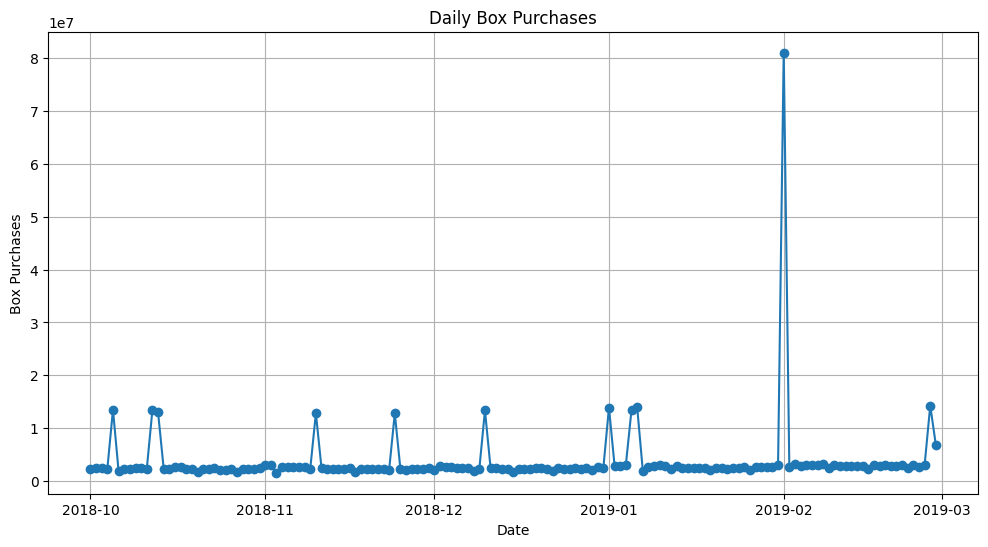

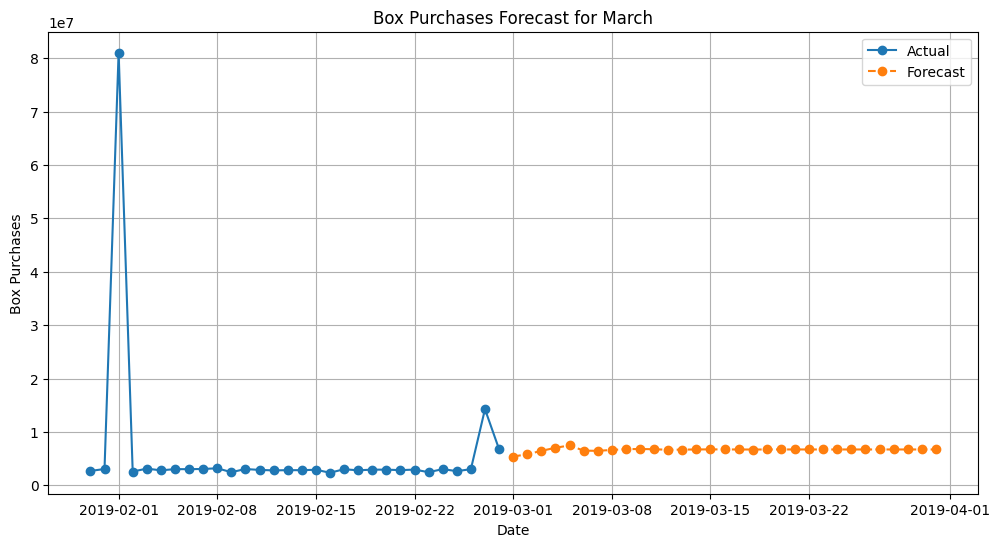

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# Sample DataFrame with historical purchase data
data = purchase

df = pd.DataFrame(data)

# Convert 'PURCHASE_DATE' to datetime
df['PURCHASE_DATE'] = pd.to_datetime(df['PURCHASE_DATE'], format='%d/%m/%Y')

# Set 'PURCHASE_DATE' as index
df.set_index('PURCHASE_DATE', inplace=True)

# Resample data to daily frequency and fill missing values with 0
df_daily = df.resample('D').sum().fillna(0)

# Plot daily box purchases
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['BOX_ID'], marker='o', linestyle='-')
plt.title('Daily Box Purchases')
plt.xlabel('Date')
plt.ylabel('Box Purchases')
plt.grid(True)
plt.show()

# ARIMA model
model = ARIMA(df_daily['BOX_ID'], order=(5,1,0))
model_fit = model.fit()

# Forecast for March
forecast_steps = 31
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index[-30:], df_daily['BOX_ID'].tail(30), marker='o', linestyle='-', label='Actual')
plt.plot(pd.date_range(start='2019-03-01', periods=forecast_steps, freq='D'), forecast, marker='o', linestyle='--', label='Forecast')
plt.title('Box Purchases Forecast for March')
plt.xlabel('Date')
plt.ylabel('Box Purchases')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from tqdm import tqdm
import xgboost as xgb

# Function to map MAGIC_KEY to unique integer identifiers
def map_magic_key(df_batch):
    unique_magic_keys = df_batch['MAGIC_KEY'].unique()
    magic_key_map = {}
    for idx, key in enumerate(unique_magic_keys):
        magic_key_map[key] = idx
    df_batch['MAGIC_KEY_ID'] = df_batch['MAGIC_KEY'].map(magic_key_map)
    return df_batch

# Sample DataFrame with historical purchase data
data =filtered_df

# Batch size for processing
batch_size = 1000

# Split data into batches
df_batches = [pd.DataFrame(data).iloc[i:i+batch_size] for i in range(0, len(data), batch_size)]

# Process batches
for idx, df_batch in enumerate(df_batches):
    df_batch['PURCHASE_DATE'] = pd.to_datetime(df_batch['PURCHASE_DATE'], format='%d/%m/%Y')
    df_batch['day_of_week'] = df_batch['PURCHASE_DATE'].dt.dayofweek
    df_batch['day_of_month'] = df_batch['PURCHASE_DATE'].dt.day
    df_batch['month'] = df_batch['PURCHASE_DATE'].dt.month
    df_batches[idx] = map_magic_key(df_batch)

# Concatenate processed batches
df = pd.concat(df_batches)

# Features and target variable
X = df[['day_of_week', 'day_of_month', 'month', 'MAGIC_KEY_ID']]
y = df['BOX_ID']  # Subtract 1 from labels to start from 0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
model = SVC()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prediction for March
march_features = pd.DataFrame({'day_of_week': [0]*31, 'day_of_month': range(1, 32), 'month': [3]*31, 'MAGIC_KEY_ID': [0]*31})  # Assuming March has 31 days
march_predictions = model.predict(march_features)
print("Predictions for March:", march_predictions)


In [ ]:
df

In [ ]:
# Features and target variable
X = df[['day_of_week']['MAGIC_KEY']]
y = df['BOX_ID']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=10, random_state=10)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Prediction for March
march_features = pd.DataFrame({'day_of_week': [0]*31})  # Assuming March has 31 days
march_predictions = model.predict(march_features)
print("Predictions for March:", march_predictions)
